<a href="https://colab.research.google.com/github/simaryadav/learning_roadmap/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import all basic ml libraries, tf and dl libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [ ]:
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [ ]:
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [ ]:
X = pd.concat([X,geography,gender],axis = 1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
X['Germany'] = X['Germany'].astype(int)
X['Spain'] = X['Spain'].astype(int)
X['Male'] = X['Male'].astype(int)

In [ ]:
X.drop(['Geography','Gender'],axis = 1, inplace = True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
classifier = Sequential()

In [ ]:
from keras.layers import Dropout

In [ ]:
classifier.add(Dense(units = 11, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 21, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 16, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 21)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 753 (2.94 KB)

 Trainable params: 753 (2.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4651 - loss: 0.8175 - val_accuracy: 0.8035 - val_loss: 0.4764
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8038 - loss: 0.4643 - val_accuracy: 0.8035 - val_loss: 0.4495
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8148 - loss: 0.4401 - val_accuracy: 0.8050 - val_loss: 0.4386
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8126 - loss: 0.4356 - val_accuracy: 0.7986 - val_loss: 0.4372
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8173 - loss: 0.4200 - val_accuracy: 0.8152 - val_loss: 0.4285
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8331 - loss: 0.3977 - val_accuracy: 0.8167 - val_loss: 0.4227
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8276 - loss: 0.4088 - val_accuracy: 0.8209 - val_loss: 0.4158
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8358 - loss: 0.3903 - val_accu

In [ ]:
print(model.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
model.history['accuracy']

[0.6570255756378174,
 0.8104124069213867,
 0.8150774240493774,
 0.8206754922866821,
 0.8221682906150818,
 0.8277663588523865,
 0.831498384475708,
 0.8350438475608826,
 0.8430677652359009,
 0.845120370388031,
 0.8497853875160217,
 0.8574360609054565,
 0.8561298847198486,
 0.8565030694007874,
 0.8568762540817261,
 0.8596752882003784,
 0.8615413308143616,
 0.8606083393096924,
 0.8615413308143616,
 0.8624743223190308,
 0.8626609444618225,
 0.8641537427902222,
 0.8628475666046143,
 0.8611681461334229,
 0.8637805581092834,
 0.8649001717567444,
 0.8660197854042053,
 0.8647135496139526,
 0.8645269870758057,
 0.8650867938995361,
 0.8654599785804749,
 0.8701249957084656,
 0.866392970085144,
 0.866392970085144,
 0.8676992058753967,
 0.8667662143707275,
 0.868445634841919,
 0.8688188195228577,
 0.8695651888847351,
 0.8690053820610046,
 0.8691920042037964,
 0.868445634841919,
 0.8691920042037964,
 0.8704982399940491,
 0.8680723905563354,
 0.87161785364151,
 0.8699384331703186,
 0.8708714246749878,


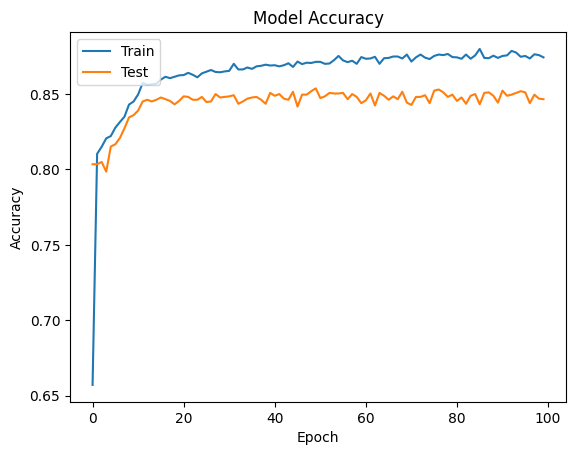

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [ ]:
score

0.851

In [ ]:
!pip install RandomSearch

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  model.add(Dense(units=hp.Int('units_input', min_value=8, max_value=64, step=8),
                  kernel_initializer='he_uniform', activation='relu', input_dim=11))
  model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

  # Add a variable number of hidden layers
  for i in range(hp.Int('num_layers', 1, 4)):
    model.add(Dense(units=hp.Int(f'units_{i}', min_value=8, max_value=64, step=8),
                    kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(hp.Float(f'dropout_{i+1}', min_value=0.2, max_value=0.5, step=0.1)))

  model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=50,  # Number of different hyperparameter combinations to try
    executions_per_trial=3,  # Run each trial multiple times to reduce noise
    directory='tuner_results',  # Where to store results
    project_name='churn_classifier'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Assuming X_train and y_train are your training data
tuner.search(X_train, y_train, epochs=20, validation_split=0.2)

Trial 50 Complete [00h 00m 59s]
val_accuracy: 0.7977083325386047

Best val_accuracy So Far: 0.8599999944368998
Total elapsed time: 00h 44m 47s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3
